# Project: Insurance Policy Cancellation
---------------------------------------------





# Dataset Description
The Kangaroo data set is based on 4 years of property insurance policies from 2013 to 2017. There are roughly 1 million policies in the training data and each policy only has one observation. There were almost 230,000 policies canceled during the effective term. Your work is to build a model on the training data and use your best model to predict the cancelation indicator for each policy in test data.

Variable descriptions
* id - Policy id (cannot be used in model)
* tenure - Number of years with Kangaroo
* claim.ind - Occurrence of claim (0=no, 1=yes)
* n.adults - Number of adults in the property
* n.children - Number of children in the property
* ni.gender - Gender of policyholder
* ni.marital.status - Marital status of policyholder (0=no, 1=yes)
* premium - Price of the policy
* sales.channel - Medium through which policy was purchased
* coverage.type - Type of coverage
* dwelling.type - Type of dwelling
* len.at.res - Length at residence (how long policyholder lived at property)
* credit - Financial credit level of policyholder
* house.color - Color of house
* ni.age - Age of policholder
* year - Year of the policy
* zip.code - Zip code of the property
* cancel - cancelation indicator (0=not cancel, 1=may cancel but can be convinced, 2=cancel). **This is the response variable.** Dave is deleting the rows where `cancel==-1`!

The train and test files have also been made available to students for modeling on HuskyCT.

In [ ]:
# https://drive.google.com/file/d/1cF4YgsHb6jWoM8s1oMckCE5DXz71dJIr/view?usp=share_link
# https://drive.google.com/file/d/1k8asF0dptYNn1DFkylSEpr0D9FstpIO4/view?usp=share_link
# https://drive.google.com/file/d/1nldFnY3-FBKDvfpyLXjD9uxm7d7SLo6n/view?usp=share_link
# https://drive.google.com/file/d/1VirvGGFaqg1ifPjgO0MzHg3Bc7KuwotG/view?usp=share_link

!gdown 1cF4YgsHb6jWoM8s1oMckCE5DXz71dJIr
!gdown 1k8asF0dptYNn1DFkylSEpr0D9FstpIO4
!gdown 1nldFnY3-FBKDvfpyLXjD9uxm7d7SLo6n
!gdown 1VirvGGFaqg1ifPjgO0MzHg3Bc7KuwotG

Downloading...
From: https://drive.google.com/uc?id=1cF4YgsHb6jWoM8s1oMckCE5DXz71dJIr
To: /content/X_test.csv
100% 31.5M/31.5M [00:00<00:00, 177MB/s]
Downloading...
From: https://drive.google.com/uc?id=1k8asF0dptYNn1DFkylSEpr0D9FstpIO4
To: /content/X_train.csv
100% 63.9M/63.9M [00:00<00:00, 129MB/s]
Downloading...
From: https://drive.google.com/uc?id=1nldFnY3-FBKDvfpyLXjD9uxm7d7SLo6n
To: /content/y_test.csv
100% 690k/690k [00:00<00:00, 38.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1VirvGGFaqg1ifPjgO0MzHg3Bc7KuwotG
To: /content/y_train.csv
100% 1.40M/1.40M [00:00<00:00, 22.5MB/s]


![picture](https://d2slcw3kip6qmk.cloudfront.net/marketing/blog/2018Q2/business-analysis-models/business-analysis-models-header@2x.png)











#Loading the data

In [ ]:
# Load data
import numpy as nm
import pandas as pd
from pylab import *
X_train=pd.read_csv("/content/X_train.csv")
X_test=pd.read_csv("/content/X_test.csv")
y_train=pd.read_csv("/content/y_train.csv")
y_test=pd.read_csv("/content/y_test.csv")
X_train.head()
X_test.head()
y_train.head()
y_test.head()


,cancel
0,0
1,0
2,0
3,0
4,2


In [ ]:
#shape of data before dropping null values
print(X_train.shape, X_test.shape,y_train.shape,y_test.shape)

(700232, 17) (344891, 17) (700232, 1) (344891, 1)


#Data Cleaning and EDA

##Dropping ID column

In [ ]:
X_train.drop('id',axis=1,inplace = True)
X_test.drop('id',axis=1,inplace=True)

##Handling Missing Values

###Concatenating

In [ ]:
train_all = pd.concat([X_train,y_train],axis=1) # Concatenating the training data

test_all = pd.concat([X_test,y_test],axis=1) # Concatenating the test data

In [ ]:

print(train_all.shape,test_all.shape)

(700232, 17) (344891, 17)


###Displaying number of Null values

In [ ]:
train_all.isna().sum()
test_all.isna().sum()

year                   0
zip.code             313
house.color          319
ni.age               293
len.at.res           295
credit               289
coverage.type        316
dwelling.type        339
premium              331
sales.channel        324
ni.gender            314
ni.marital.status    345
n.adults             323
n.children           319
tenure               323
claim.ind            324
cancel                 0
dtype: int64

###Imputation- for numeric variables

In [ ]:
train_all_cleaned = train_all.fillna(train_all.mean())
test_all_cleaned = test_all.fillna(test_all.mean())

<ipython-input-8-9496e2626454>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_all_cleaned = train_all.fillna(train_all.mean())
<ipython-input-8-9496e2626454>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  test_all_cleaned = test_all.fillna(test_all.mean())


In [ ]:
train_all_cleaned.isna().sum()
test_all_cleaned.isna().sum()

year                   0
zip.code               0
house.color          319
ni.age                 0
len.at.res             0
credit               289
coverage.type        316
dwelling.type        339
premium                0
sales.channel        324
ni.gender            314
ni.marital.status      0
n.adults               0
n.children             0
tenure                 0
claim.ind              0
cancel                 0
dtype: int64

###Imputation- for categorical variables

In [ ]:
# Find the mode of the  variables
mode = train_all_cleaned['house.color'].mode()[0]
mode = test_all_cleaned['house.color'].mode()[0]

# Fill the missing values with the mode
train_all_cleaned['house.color'].fillna(mode, inplace=True)
test_all_cleaned['house.color'].fillna(mode, inplace=True)

# Find the mode of the  variables
mode = train_all_cleaned['credit'].mode()[0]
mode = test_all_cleaned['credit'].mode()[0]

# Fill the missing values with the mode
train_all_cleaned['credit'].fillna(mode, inplace=True)
test_all_cleaned['credit'].fillna(mode, inplace=True)

# Find the mode of the  variables
mode = train_all_cleaned['coverage.type'].mode()[0]
mode = test_all_cleaned['coverage.type'].mode()[0]

# Fill the missing values with the mode
train_all_cleaned['coverage.type'].fillna(mode, inplace=True)
test_all_cleaned['coverage.type'].fillna(mode, inplace=True)

# Find the mode of the  variables
mode = train_all_cleaned['dwelling.type'].mode()[0]
mode = test_all_cleaned['dwelling.type'].mode()[0]

# Fill the missing values with the mode
train_all_cleaned['dwelling.type'].fillna(mode, inplace=True)
test_all_cleaned['dwelling.type'].fillna(mode, inplace=True)

# Find the mode of the  variables
mode = train_all_cleaned['sales.channel'].mode()[0]
mode = test_all_cleaned['sales.channel'].mode()[0]

# Fill the missing values with the mode
train_all_cleaned['sales.channel'].fillna(mode, inplace=True)
test_all_cleaned['sales.channel'].fillna(mode, inplace=True)

# Find the mode of the  variables
mode = train_all_cleaned['ni.gender'].mode()[0]
mode = test_all_cleaned['ni.gender'].mode()[0]

# Fill the missing values with the mode
train_all_cleaned['ni.gender'].fillna(mode, inplace=True)
test_all_cleaned['ni.gender'].fillna(mode, inplace=True)


In [ ]:
train_all_cleaned.isna().sum()


year                 0
zip.code             0
house.color          0
ni.age               0
len.at.res           0
credit               0
coverage.type        0
dwelling.type        0
premium              0
sales.channel        0
ni.gender            0
ni.marital.status    0
n.adults             0
n.children           0
tenure               0
claim.ind            0
cancel               0
dtype: int64

In [ ]:
test_all_cleaned.isna().sum()

year                 0
zip.code             0
house.color          0
ni.age               0
len.at.res           0
credit               0
coverage.type        0
dwelling.type        0
premium              0
sales.channel        0
ni.gender            0
ni.marital.status    0
n.adults             0
n.children           0
tenure               0
claim.ind            0
cancel               0
dtype: int64

In [ ]:
df1 = train_all_cleaned.drop(['cancel'],axis=1)
df1.shape

(700232, 16)

###Splitting back

In [ ]:
# Since X_train doesn't have cancel column in X_train we make use of the drop() function to drop the column and y_train will be consisting of only cancel column
X_train = train_all_cleaned.drop(['cancel'],axis=1)
# Since we only take once column python might take it as Series object so we convert that into a DataFrame object
y_train = pd.DataFrame(train_all_cleaned['cancel'])
# Checking the shape of each of the train dataset
print(X_train.shape, y_train.shape)



(700232, 16) (700232, 1)


In [ ]:
# Since X_train doesn't have cancel column in X_train we make use of the drop() function to drop the column and y_train will be consisting of only cancel column
X_test = test_all_cleaned.drop(['cancel'],axis=1)
# Since we only take once column python might take it as Series object so we convert that into a DataFrame object
y_test = pd.DataFrame(test_all_cleaned['cancel'])
# Checking the shape of each of the train dataset
print(X_test.shape, y_test.shape)

(344891, 16) (344891, 1)


### Correlations

In [ ]:
# Find the correlation matrix between X_train and y_train
corr_matrix = pd.concat([X_train, y_train], axis=1).corr()

# Extract the correlation between X_train and y_train
corr_Xy = corr_matrix.iloc[:-1, -1]

# Print the correlations
print("Correlation between X_train and y_train:")
print(corr_Xy)


<ipython-input-16-c280a340f1ef>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = pd.concat([X_train, y_train], axis=1).corr()


Correlation between X_train and y_train:
year                -0.020495
zip.code             0.012265
ni.age              -0.102963
len.at.res          -0.040072
premium             -0.027120
ni.marital.status   -0.024788
n.adults             0.041381
n.children           0.089021
tenure              -0.028853
claim.ind            0.067014
Name: cancel, dtype: float64


###Plots and Heat Map

####Heat Map

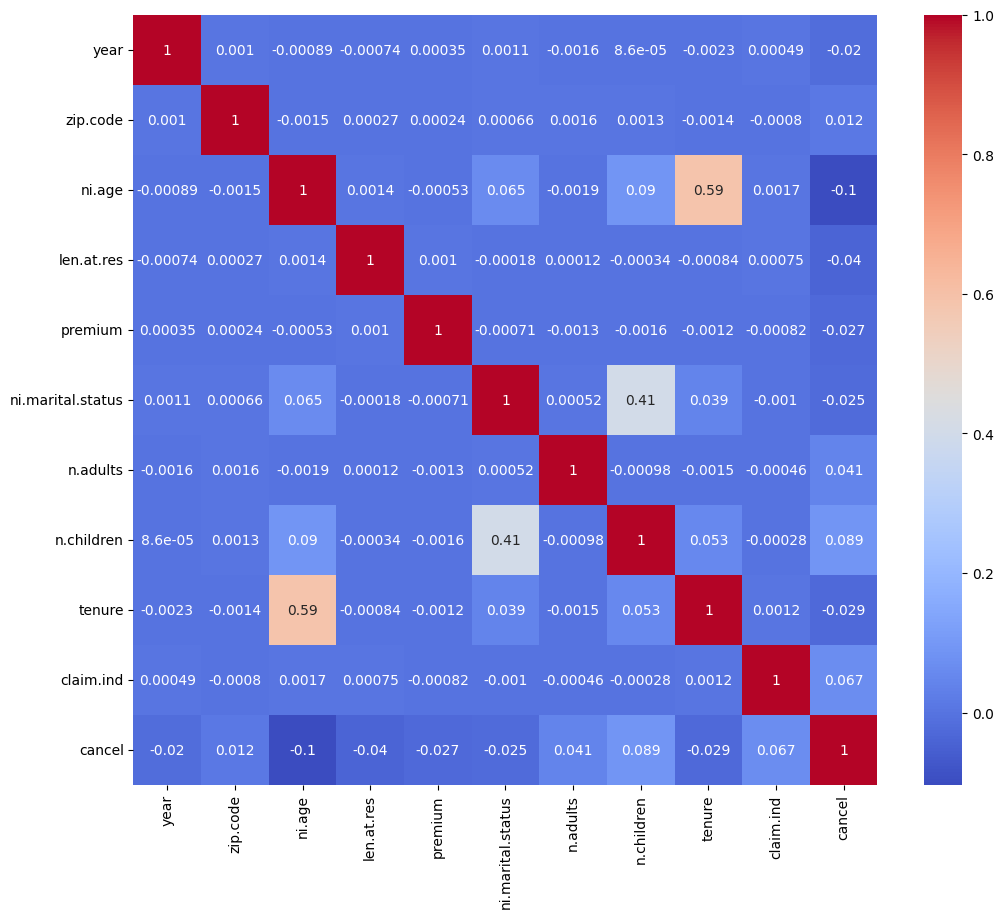

In [ ]:
import seaborn as sns
# create a figure object with a specific size
fig = plt.figure(figsize=(12, 10))

# creating heatmap to show correlation between variables
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
# to display the heat map
plt.show()

The above Heat Map gives information about relationship among the variables present in the data set.  

In [ ]:
# Building plots against the cancellation indicator

####Cancel vs Credit Plot

cancel       0      1      2
credit                      
high    342856  20873  69307
low      55095  13186  46229
medium   98591  16451  37644


<Axes: xlabel='credit'>

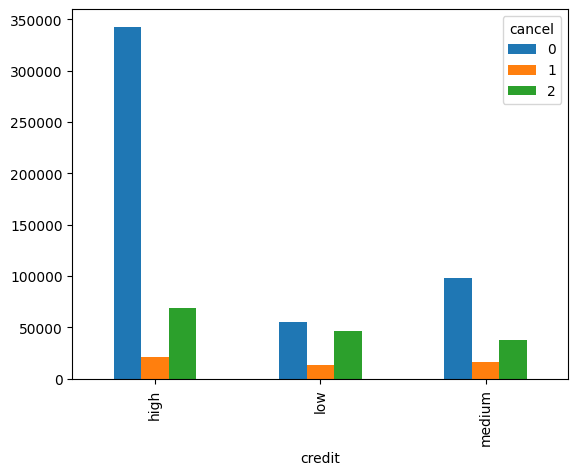

In [ ]:
import matplotlib.pyplot as plt
cancel_credit=pd.crosstab(index=X_train['credit'],columns=y_train['cancel'])
print(cancel_credit)

cancel_credit.plot.bar()

From the above plot we can observe that there are highest number of uncancelled policies that belonged to the policyholders with high credit also they had highest policies that may cancel and have been cancelled. We can say that the policy holders with high credit level take most number of policies.

####Cancel vs Coverage Type Plot

cancel              0      1      2
coverage.type                      
A              171973  16442  49753
B              119259  11975  36607
C              205310  22093  66820


<Axes: xlabel='coverage.type'>

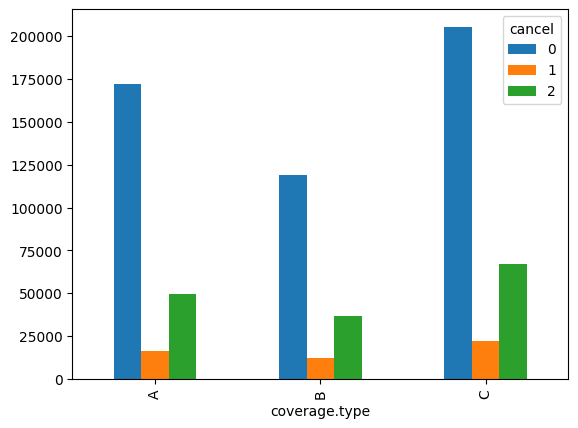

In [ ]:
cancel_coverage_type=pd.crosstab(index=X_train['coverage.type'],columns=y_train['cancel'])
print(cancel_coverage_type)
cancel_coverage_type.plot.bar()


From the above plot we can observe that the policy holders with C type of coverage take the highest policies and B type takes the least.

####Cancel vs Dwelling Type Plot

cancel              0      1      2
dwelling.type                      
Condo          116684  12830  38441
House          285164  26519  81673
Tenant          94694  11161  33066


<Axes: xlabel='dwelling.type'>

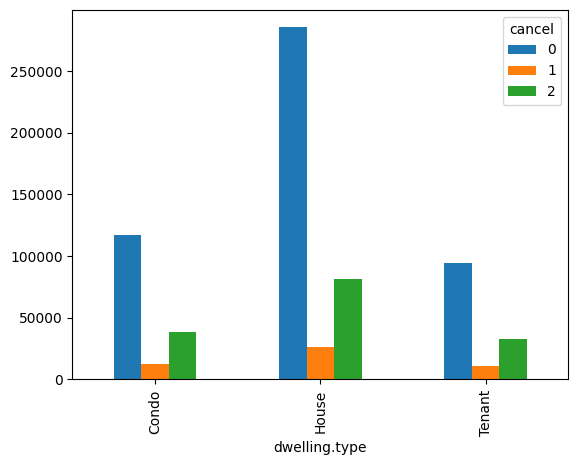

In [ ]:
cancel_dwelling_type=pd.crosstab(index=X_train['dwelling.type'],columns=y_train['cancel'])
print(cancel_dwelling_type)
cancel_dwelling_type.plot.bar()


From the above plot we can observe that House type of dwelling make the highest number of policies.

####Cancel vs Sales Channel Plot

cancel              0      1      2
sales.channel                      
Broker         319412  20518  67375
Online          36961   5654  16712
Phone          140169  24338  69093


<Axes: xlabel='sales.channel'>

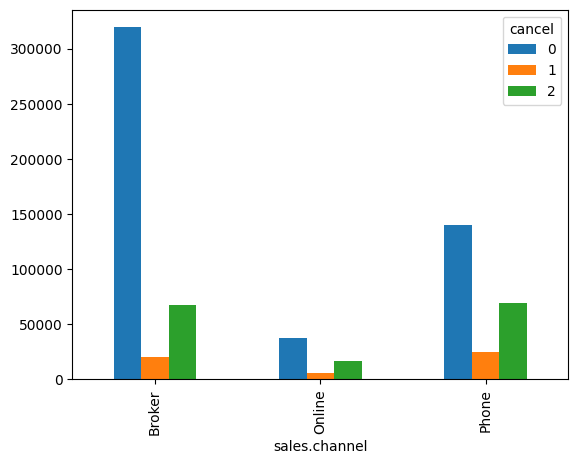

In [ ]:
cancel_sales_channel=pd.crosstab(index=X_train['sales.channel'],columns=y_train['cancel'])
print(cancel_sales_channel)
cancel_sales_channel.plot.bar()

From the above plot we observe that the policies taken through online sale channel are the least and they tend to be cancelled less than the one taken through other channels. Also we see that the highest number of policies are taken through Broker.

####Cancel vs Gender Plot

cancel          0      1      2
ni.gender                      
F          238212  24115  73246
M          258330  26395  79934


<Axes: xlabel='ni.gender'>

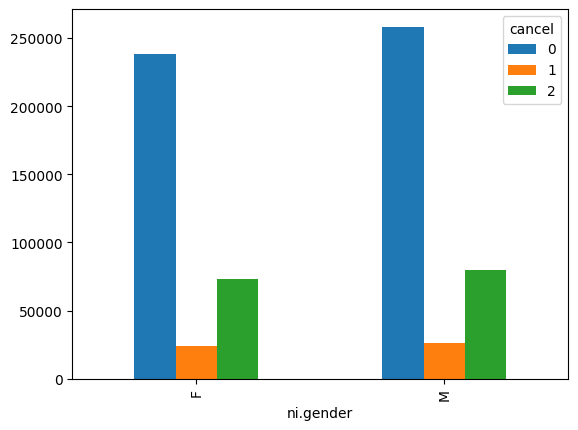

In [ ]:
cancel_gender=pd.crosstab(index=X_train['ni.gender'],columns=y_train['cancel'])
print(cancel_gender)
cancel_gender.plot.bar()

From the obove plot we can observe that highest number of policies are taken by males.

####Cancel vs Marital Status Plot

cancel                  0      1       2
ni.marital.status                       
0.000000           139514  16037   46814
0.710736              473     47     127
1.000000           356555  34426  106239


<Axes: xlabel='ni.marital.status'>

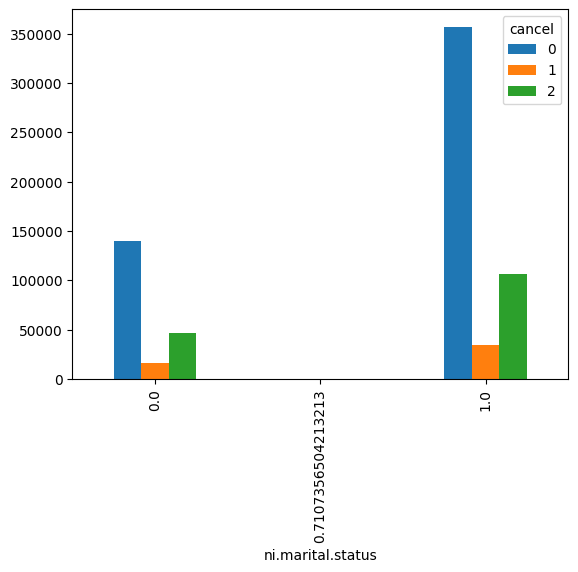

In [ ]:
cancel_marital=pd.crosstab(index=X_train['ni.marital.status'],columns=y_train['cancel'])
print(cancel_marital)
cancel_marital.plot.bar()

From the above plot we can observe that the married people take the highest number of policies.

####Cancel vs Claim.ind Plot


cancel          0      1       2
claim.ind                       
0.000000   406342  37823  116101
0.199133      475     53     130
1.000000    89725  12634   36949


<Axes: xlabel='claim.ind'>

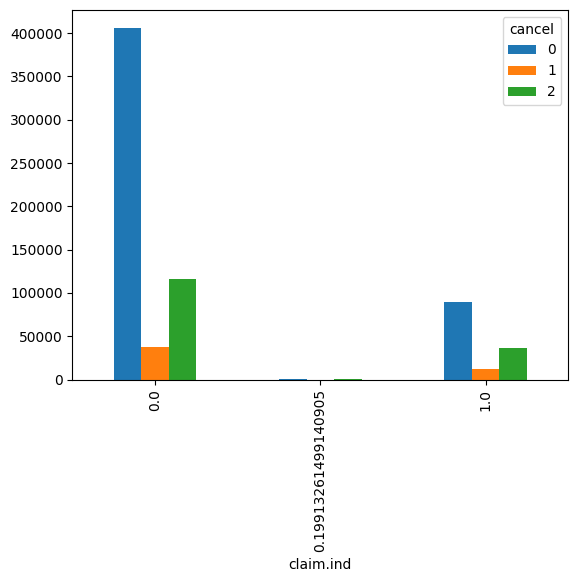

In [ ]:
cancel_claim=pd.crosstab(index=X_train['claim.ind'],columns=y_train['cancel'])
print(cancel_claim)
cancel_claim.plot.bar()

From the above plot we observe that Highest policies are made when there is no occurance of claim.

## Converting categorical variables to numerical variables

In [ ]:
# Impoting label enconder, train_test_split, standard scaler from sklearn
from sklearn.preprocessing import LabelEncoder # for cat to num conversion
from sklearn.model_selection import train_test_split #for splitting data
from sklearn.preprocessing import StandardScaler
le=LabelEncoder()

#X_train categorical data to numerical data
X_train['house.color']=le.fit_transform(X_train['house.color'])
X_train['credit']=le.fit_transform(X_train['credit'])
X_train['coverage.type']=le.fit_transform(X_train['coverage.type'])
X_train['dwelling.type']=le.fit_transform(X_train['dwelling.type'])
X_train['sales.channel']=le.fit_transform(X_train['sales.channel'])
X_train['ni.gender']=le.fit_transform(X_train['ni.gender'])

#X_test categorical data to numerical data
X_test['house.color']=le.fit_transform(X_test['house.color'])
X_test['credit']=le.fit_transform(X_test['credit'])
X_test['coverage.type']=le.fit_transform(X_test['coverage.type'])
X_test['dwelling.type']=le.fit_transform(X_test['dwelling.type'])
X_test['sales.channel']=le.fit_transform(X_test['sales.channel'])
X_test['ni.gender']=le.fit_transform(X_test['ni.gender'])

In [ ]:
# Printing shapes of X_train and y_train
print(X_train.shape,y_train.shape)

(700232, 16) (700232, 1)


In [ ]:
#checking data after tranformation
#house_color-blue=0,red=1,white=2,yellow=3
#credit- 0,1,2- high,med,low
X_test.head(20)

,year,zip.code,house.color,ni.age,len.at.res,credit,coverage.type,dwelling.type,premium,sales.channel,ni.gender,ni.marital.status,n.adults,n.children,tenure,claim.ind
0,2013,50020.0,2,33.0,16.000000,0,2,1,796.385532,0,0,1.0,1.0,3.0,2.0,1.0
1,2013,80002.0,1,56.0,10.000000,0,0,1,773.232687,0,1,1.0,2.0,0.0,14.0,0.0
2,2015,85005.0,2,46.0,12.000000,0,2,0,943.047142,0,0,1.0,2.0,2.0,9.0,0.0
3,2015,98026.0,0,45.0,15.000000,0,0,2,949.368847,0,1,1.0,1.0,3.0,12.0,0.0
4,2014,50022.0,2,28.0,19.000000,1,2,2,875.873613,0,0,1.0,1.0,1.0,7.0,1.0
5,2015,98001.0,2,54.0,14.000000,0,2,1,888.300599,2,0,0.0,2.0,0.0,14.0,1.0
6,2014,80028.0,1,38.0,13.000000,2,0,0,1011.257920,2,0,0.0,2.0,0.0,10.0,0.0
7,2013,80016.0,1,62.0,9.000000,0,0,1,795.613301,2,0,1.0,2.0,1.0,15.0,0.0
8,2014,80002.0,2,39.0,23.545986,2,1,2,914.537282,2,0,0.0,1.0,0.0,20.0,0.0
9,2013,85025.0,0,40.0,16.000000,0,0,1,833.086745,2,1,1.0,1.0,2.0,18.0,1.0


## Implementing transform and fit_transform functions

In [ ]:
# Impoting standardscaler from sklearn preprocessing
from sklearn.preprocessing import StandardScaler
# assigning standard scaler to scaler
scaler = StandardScaler()
# fit transforming X train and transforming X test
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
#Printing shapes of X train & X test
print(X_train.shape,X_test.shape)


(700232, 16) (344891, 16)


# Sampling using SMOTE

In [ ]:
#Importing SMOTE class from imblearn package to handle imbalanced dataset by oversampling the minority class
from imblearn.over_sampling import SMOTE

# Importing SVMSMOTE class from imblearn package which is another variant of SMOTE that uses an SVM to generate synthetic samples.
from imblearn.over_sampling import SVMSMOTE

 #Importing Counter class from collections module to count the number of occurrences of each class in a dataset.
from collections import Counter

# Setting a random seed for reproducibility.
random_state = 123

# Initializing an oversampling object of SMOTE with k_neighbors set to 9.
oversample = SMOTE(k_neighbors=9)

# Applying SMOTE on the training set (X_train, y_train) and creating a new balanced training set (X_res, y_res) by generating synthetic samples for the minority class.
X_res, y_res = oversample.fit_resample(X_train, y_train)

# Counting the number of instances in each class of the balanced training set (y_res) after applying SMOTE, specifically the class cancel.
counter = Counter(y_res['cancel'])

# Printing the class distribution of the balanced training set.
print(counter)

Counter({0: 496542, 2: 496542, 1: 496542})


# Models

In [ ]:
# Importing accuracy_score, f2score, confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, classification_report

##Naive Bayes

In [ ]:
# Importing the Gaussian Naive Bayes classifier from the scikit-learn library.
from sklearn.naive_bayes import GaussianNB
# Importing necessary evaluation metrics from scikit-learn.
from sklearn.metrics import confusion_matrix, classification_report

# Initializing a Decision Tree Classifier object as nb_model.
nb_model = GaussianNB()
# Fitting the Decision Tree Classifier on the balanced training set (X_res, y_res).
nb_model.fit(X_res, y_res)

 # Predicting the target class on the balanced training and test set.
train_preds = nb_model.predict(X_res)
test_preds = nb_model.predict(X_test)

print('Train results: \n')
print(classification_report(y_res, train_preds))
print('Test results: \n')

# Printing the classification report for the test set which includes precision, recall, f1-score, and support.
print(classification_report(y_test, test_preds))

# Calculating and printing the weighted F1 score for the test set.
print("Accuracy:", accuracy_score(y_test, test_preds))
weighted_f1 = f1_score(y_test, test_preds, average='weighted')
print("Weighted F1 score:", weighted_f1)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train results: 

              precision    recall  f1-score   support

           0       0.51      0.60      0.55    496542
           1       0.44      0.56      0.49    496542
           2       0.42      0.24      0.30    496542

    accuracy                           0.46   1489626
   macro avg       0.46      0.46      0.45   1489626
weighted avg       0.46      0.46      0.45   1489626

Test results: 

              precision    recall  f1-score   support

           0       0.82      0.60      0.69    244522
           1       0.12      0.51      0.19     24772
           2       0.32      0.25      0.28     75597

    accuracy                           0.51    344891
   macro avg       0.42      0.45      0.39    344891
weighted avg       0.66      0.51      0.56    344891

Accuracy: 0.5132549124216057
Weighted F1 score: 0.5630076656667753


### Accuracy: 51.3 %

### F1 score: 56.3

##Neural Network

In [ ]:
# Importing the MLP classifier from the scikit-learn library.
from sklearn.neural_network import MLPClassifier
random_state = 123
# Initializing a MLP Classifier object as nn.
nn = MLPClassifier(hidden_layer_sizes=(500, 200), activation='relu', solver='adam', alpha=0.001, learning_rate_init=0.01, random_state=123)
# Fitting the neural network on the balanced training set (X_res, y_res).
nn.fit(X_res, y_res)
# Predicting the target class on the balanced training and test set.
train_preds = nn.predict(X_res)
test_preds = nn.predict(X_test)
print('Train results: \n')
print(classification_report(y_res, train_preds))
print('Test results: \n')
# Printing the classification report for the test set which includes precision, recall, f1-score, and support.
print(classification_report(y_test, test_preds))
# Calculating and printing the weighted F1 score for the test set.
print("Accuracy:", accuracy_score(y_test, test_preds))
weighted_f1 = f1_score(y_test, test_preds, average='weighted')
print("Weighted F1 score:", weighted_f1)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train results: 

              precision    recall  f1-score   support

           0       0.71      0.78      0.74    496542
           1       0.84      0.94      0.89    496542
           2       0.74      0.58      0.65    496542

    accuracy                           0.77   1489626
   macro avg       0.76      0.77      0.76   1489626
weighted avg       0.76      0.77      0.76   1489626

Test results: 

              precision    recall  f1-score   support

           0       0.85      0.78      0.81    244522
           1       0.49      0.93      0.64     24772
           2       0.48      0.45      0.46     75597

    accuracy                           0.72    344891
   macro avg       0.60      0.72      0.64    344891
weighted avg       0.74      0.72      0.72    344891

Accuracy: 0.7204160154947505
Weighted F1 score: 0.7241848191778751


### Accuracy: 72.04 %


### F1 Score: 72.41

##Random Forest

In [ ]:
# Importing the Random Forest classifier from the scikit-learn library.
from sklearn.ensemble import RandomForestClassifier
# Initializing a RFC Classifier object as rf.
rf = RandomForestClassifier(n_estimators=500, max_depth=10, min_samples_split=5, min_samples_leaf=2, max_features='sqrt', random_state=123)
# Fitting the random forest on the balanced training set (X_res, y_res).
rf.fit(X_res, y_res)
# Predicting the target class on the balanced training and test set.
train_preds = rf.predict(X_res)
test_preds = rf.predict(X_test)
print('Train results: \n')
print(classification_report(y_res, train_preds))
print('Test results: \n')
# Printing the classification report for the test set which includes precision, recall, f1-score, and support.
print(classification_report(y_test, test_preds))
print("Accuracy:", accuracy_score(y_test, test_preds))
# Calculating and printing the weighted F1 score for the test set.
weighted_f1 = f1_score(y_test, test_preds, average='weighted')
print("Weighted F1 score:", weighted_f1)

<ipython-input-33-2eecadfd30bc>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_res, y_res)


Train results: 

              precision    recall  f1-score   support

           0       0.73      0.75      0.74    496542
           1       0.65      0.89      0.75    496542
           2       0.77      0.44      0.56    496542

    accuracy                           0.70   1489626
   macro avg       0.71      0.70      0.68   1489626
weighted avg       0.71      0.70      0.68   1489626

Test results: 

              precision    recall  f1-score   support

           0       0.83      0.75      0.79    244522
           1       0.23      0.77      0.36     24772
           2       0.54      0.30      0.39     75597

    accuracy                           0.66    344891
   macro avg       0.53      0.61      0.51    344891
weighted avg       0.73      0.66      0.67    344891

Accuracy: 0.6550185420901097
Weighted F1 score: 0.671619316587512


### Accuracy: 65.50 %


### F1 Score: 67.16

Optimal Hyperparameter for Random tree forest

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

# Create a synthetic dataset for illustration purposes
X_resample, y_resample = make_classification(n_samples=1000, random_state=42)

# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Define the model to use
model = RandomForestClassifier()

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='f1')

# Fit the GridSearchCV object to the data
grid_search.fit(X_resample, y_resample)

# Print the best hyperparameters and F1 score
print("Best hyperparameters:", grid_search.best_params_)
print("Best F1 score:", grid_search.best_score_)

Best hyperparameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
Best F1 score: 0.9010948172531588


##Decision Tree

In [ ]:
# Importing the Decision Tree classifier from the scikit-learn library.
from sklearn.tree import DecisionTreeClassifier
# Initializing a Decision Tree Classifier object as DTC with min_splis = 10.
DTC = DecisionTreeClassifier(min_samples_split=10)
# Fitting the DTC on the balanced training set (X_res, y_res).
DTC.fit(X_res, y_res)
# Predicting the target class on the balanced training and test set.
train_preds = DTC.predict(X_res)
test_preds = DTC.predict(X_test)
print('Train results: \n')
print(classification_report(y_res, train_preds))
print('Test results: \n')
# Printing the classification report for the test set which includes precision, recall, f1-score, and support.
print(classification_report(y_test, test_preds))
print("Accuracy:", accuracy_score(y_test, test_preds))
# Calculating and printing the weighted F1 score for the test set.
weighted_f1_score = f1_score(y_test, test_preds, average='weighted')
print("Weighted F1 score:", weighted_f1_score)

Train results: 

              precision    recall  f1-score   support

           0       0.91      0.95      0.93    496542
           1       0.96      0.96      0.96    496542
           2       0.94      0.89      0.91    496542

    accuracy                           0.93   1489626
   macro avg       0.93      0.93      0.93   1489626
weighted avg       0.93      0.93      0.93   1489626

Test results: 

              precision    recall  f1-score   support

           0       0.77      0.77      0.77    244522
           1       0.38      0.44      0.41     24772
           2       0.33      0.32      0.33     75597

    accuracy                           0.64    344891
   macro avg       0.49      0.51      0.50    344891
weighted avg       0.65      0.64      0.65    344891

Accuracy: 0.644884905665848
Weighted F1 score: 0.6458376633401193


### Accuracy: 64.48 %



### F1 Score: 64.58

Optimal Hyperparameter for Decision Tree Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters to tune
hyperparams = {'criterion': ['gini', 'entropy'],
               'min_samples_split': [2, 5, 10, 15, 20],
               'max_depth': [None, 5, 10, 15, 20]}

# Create a Decision Tree Classifier object
DTC = DecisionTreeClassifier()

# Use GridSearchCV to find the best hyperparameters
grid = GridSearchCV(DTC, hyperparams, scoring='f1_weighted', cv=5)
grid.fit(X_res, y_res)

# Print the best hyperparameters and corresponding weighted F1 score
print("Best hyperparameters:", grid.best_params_)
print("Best weighted F1 score:", grid.best_score_)

# Initialize a Decision Tree Classifier object with the best hyperparameters
DTC_best = DecisionTreeClassifier(**grid.best_params_)

# Fit the optimized DTC on the balanced training set (X_res, y_res)
DTC_best.fit(X_res, y_res)

# Predict the target class on the balanced training and test set
train_preds = DTC_best.predict(X_res)
test_preds = DTC_best.predict(X_test)

# Evaluate the optimized model's performance using classification report, accuracy score, and weighted F1 score
print('Train results: \n')
print(classification_report(y_res, train_preds))
print('Test results: \n')
print(classification_report(y_test, test_preds))
print("Accuracy:", accuracy_score(y_test, test_preds))
weighted_f1_score = f1_score(y_test, test_preds, average='weighted')
print("Weighted F1 score:", weighted_f1_score)

Best hyperparameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 2}
Best weighted F1 score: 0.7549928644765611
Train results: 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    496542
           1       1.00      1.00      1.00    496542
           2       1.00      1.00      1.00    496542

    accuracy                           1.00   1489626
   macro avg       1.00      1.00      1.00   1489626
weighted avg       1.00      1.00      1.00   1489626

Test results: 

              precision    recall  f1-score   support

           0       0.78      0.74      0.76    244522
           1       0.39      0.44      0.41     24772
           2       0.32      0.35      0.33     75597

    accuracy                           0.63    344891
   macro avg       0.49      0.51      0.50    344891
weighted avg       0.65      0.63      0.64    344891

Accuracy: 0.6328782136965012
Weighted F1 score: 0.6394144512046775


## **Best Model**: **Neural Network Model**
In the comparison of the **Neural Network model** to Naive Bayes, Random Forest, and Decision Tree models based on accuracy and F1 score, the Neural Network model has the better **accuracy of 72.04 %** and a weighted **F1 score of 72.41**. Naive Bayes had an accuracy of 51.3% and an F1 score of 56.3. Random Forest had a accuracy of 65.5% and an F1 score of 67.16. Decision Tree had an accuracy of 64.48% and an F1 score of 64.58. Overall, the Neural Network model outperformed Naive Bayes and Decision Tree models and had competitive performance compared to the Random Forest model.

# Permutation on Best Model (Neural Network)

Neural Network Feature Importance:

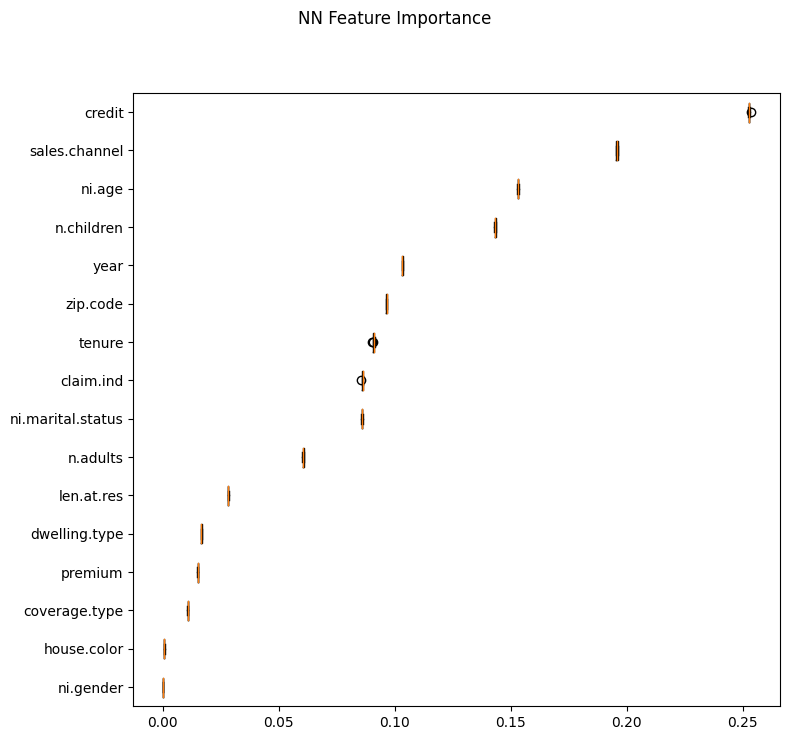

In [ ]:
# Importing the permutation_importance function from scikit-learn's inspection module to calculate feature importance by permuting the values of each feature.
from sklearn.inspection import permutation_importance
# Assigning the neural network model to the variable clf.
clf = nn
# Computing the feature importances using permutation importance with clf model, X_res and y_res data and 20 repetitions and random state set to 42. result stores the results of the permutation importance
result = permutation_importance(clf, X_res, y_res, n_repeats=20,
                                random_state=42)
# Sorting the indices of feature importances in ascending order.
perm_sorted_idx = result.importances_mean.argsort()
# Creating a figure and axis for plotting the boxplot of feature importances.
fig, ax1 = plt.subplots(1, 1, figsize=(8, 7))
# Plotting the boxplot of feature importances for each feature.
ax1.boxplot(result.importances[perm_sorted_idx].T, vert=False,
            labels=train_all_cleaned.columns[perm_sorted_idx])
# Setting the title of the plot to 'NN Feature Importance'.
fig.suptitle('NN Feature Importance', y=1.05)
# Automatically adjusting the subplot parameters to fit the plot figure area.
fig.tight_layout()
# Displaying the plot of feature importances.
plt.show()

**Top 5 Features:**

The best model, which is the Neural Network, identified the top features through permutation importance analysis as:

1. **Credit:** Financial credit level of the policyholder.
2. **Sales Channel:** Medium through which the policy was obtained.
3. **ni.age:** Age of the policyholder.
4. **n.children:** Number of children in the property.
5. **Year:** The year in which the policy was issued.

These features were found to have the greatest impact on the performance of the model in predicting the outcome of interest. By prioritizing these factors, businesses can focus their resources and efforts on improving these areas to maximize the accuracy and effectiveness of their policies.

# PDP & ICE Plots: Top Features

In [ ]:
# Installing pulp and pycebox libraries
!pip install pulp
!pip install pycebox
# Importing ice plots from pycebox
from pycebox.ice import ice, ice_plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Creating the a new df
X_df = pd.DataFrame(X_train, columns=df1.columns)
X_df.head()

,year,zip.code,house.color,ni.age,len.at.res,credit,coverage.type,dwelling.type,premium,sales.channel,ni.gender,ni.marital.status,n.adults,n.children,tenure,claim.ind
0,-1.466296,-1.691892,1.772887,0.925721,-0.047548,-0.729216,-1.243908,0.062756,0.458441,1.350753,-1.042437,0.638255,-0.905117,-0.315779,0.391017,-0.498879
1,-0.566797,0.630322,-0.288907,1.330440,0.390660,1.702992,-1.243908,0.062756,-0.827034,1.350753,-1.042437,0.638255,-0.905117,-0.315779,0.896866,-0.498879
2,-0.566797,0.808641,0.741990,0.359114,-0.047548,-0.729216,-1.243908,-1.450781,0.753995,-0.813798,0.959290,0.638255,-0.905117,-0.742795,-0.114831,2.006380
3,-0.566797,0.810392,-0.288907,1.087609,-0.047548,-0.729216,-1.243908,0.062756,0.818528,1.350753,-1.042437,0.638255,-0.106800,-0.315779,1.234098,-0.498879
4,-1.466296,0.811322,0.741990,-0.126550,0.171556,-0.729216,-0.092197,0.062756,-1.248643,-0.813798,-1.042437,0.638255,-0.106800,0.111236,0.053785,-0.498879


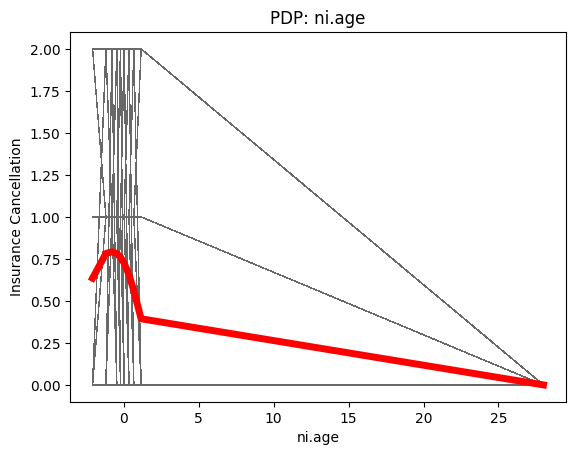

In [ ]:
# Computes and visualizes the Individual Conditional Expectation (ICE) curves and Partial Dependence Plot (PDP) for the 'ni.age' feature using the PyCEBox library
tmpdf = ice(data=X_df, column='ni.age',
                   predict=nb_model.predict,
            num_grid_points=10)

ice_plot(tmpdf, c='dimgray', linewidth=0.3,
                  plot_pdp=True,
         pdp_kwargs={'linewidth': 5, 'color':'red'})
# Sets the title of the plot to 'PDP: ni.age'.
plt.title('PDP: ni.age')
# Sets the y-axis label to 'Insurance Cancellation'.
plt.ylabel('Insurance Cancellation')
# Sets the x-axis label to 'ni.age'.
plt.xlabel('ni.age');
# Displays the plot of ICE curves and PDP.
plt.show()

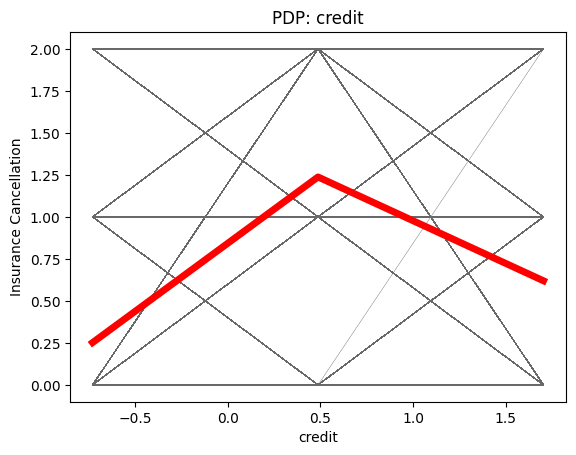

In [ ]:
# Computes and visualizes the Individual Conditional Expectation (ICE) curves and Partial Dependence Plot (PDP) for the 'credit' feature using the PyCEBox library
tmpdf = ice(data=X_df, column='credit',
                   predict=nn.predict,
            num_grid_points=10)

ice_plot(tmpdf, c='dimgray', linewidth=0.3,
                  plot_pdp=True,
         pdp_kwargs={'linewidth': 5, 'color':'red'})
# Sets the title of the plot to 'PDP: credit'.
plt.title('PDP: credit')
# Sets the y-axis label to 'Insurance Cancellation'.
plt.ylabel('Insurance Cancellation')
# Sets the x-axis label to 'credit'.
plt.xlabel('credit');
# Displays the plot of ICE curves and PDP.
plt.show()

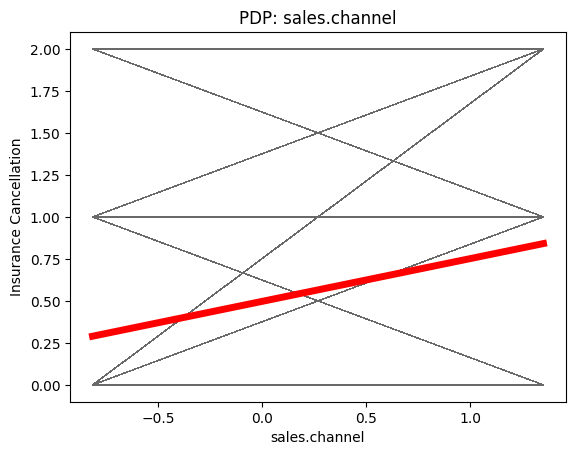

In [ ]:
# Computes and visualizes the Individual Conditional Expectation (ICE) curves and Partial Dependence Plot (PDP) for the 'sales.channel' feature using the PyCEBox library
tmpdf = ice(data=X_df, column='sales.channel',
                   predict=nn.predict,
            num_grid_points=10)

ice_plot(tmpdf, c='dimgray', linewidth=0.3,
                  plot_pdp=True,
         pdp_kwargs={'linewidth': 5, 'color':'red'})
# Sets the title of the plot to 'PDP: sales.channel'.
plt.title('PDP: sales.channel')
# Sets the y-axis label to 'Insurance Cancellation'.
plt.ylabel('Insurance Cancellation')
# Sets the x-axis label to 'sales.channel'.
plt.xlabel('sales.channel');
# Displays the plot of ICE curves and PDP.
plt.show()

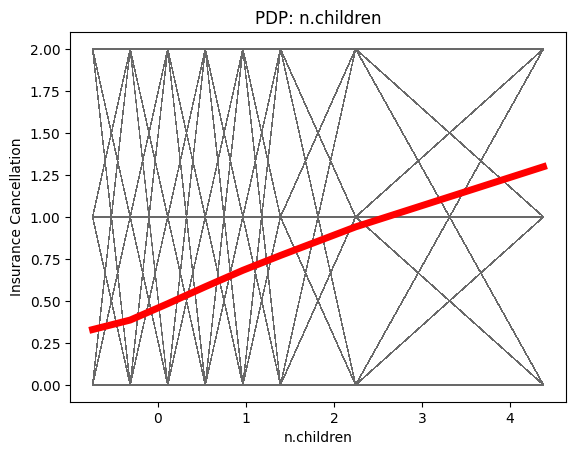

In [ ]:
# Computes and visualizes the Individual Conditional Expectation (ICE) curves and Partial Dependence Plot (PDP) for the 'n.children' feature using the PyCEBox library
tmpdf = ice(data=X_df, column='n.children',
                   predict=nn.predict,
            num_grid_points=20)

ice_plot(tmpdf, c='dimgray', linewidth=0.3,
                  plot_pdp=True,
         pdp_kwargs={'linewidth': 5, 'color':'red'})
# Sets the title of the plot to 'PDP: n.children'.
plt.title('PDP: n.children')
# Sets the y-axis label to 'Insurance Cancellation'.
plt.ylabel('Insurance Cancellation')
# Sets the x-axis label to 'n.children'.
plt.xlabel('n.children');
# Displays the plot of ICE curves and PDP.
plt.show()

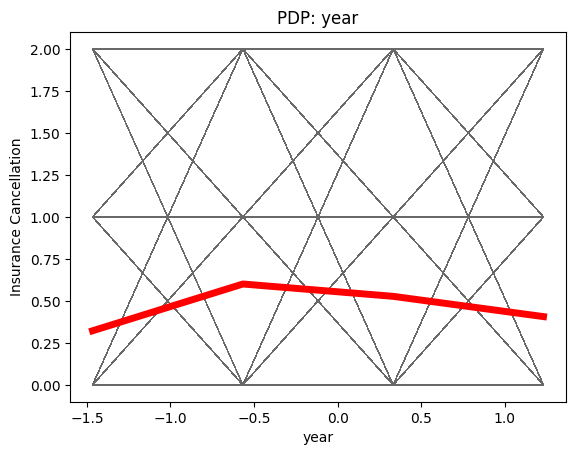

In [ ]:
# Computes and visualizes the Individual Conditional Expectation (ICE) curves and Partial Dependence Plot (PDP) for the 'year' feature using the PyCEBox library
tmpdf = ice(data=X_df, column='year',
                   predict=nn.predict,
            num_grid_points=20)

ice_plot(tmpdf, c='dimgray', linewidth=0.3,
                  plot_pdp=True,
         pdp_kwargs={'linewidth': 5, 'color':'red'})
# Sets the title of the plot to 'PDP: year'.
plt.title('PDP: year')
# Sets the y-axis label to 'Insurance Cancellation'.
plt.ylabel('Insurance Cancellation')
# Sets the x-axis label to 'year'.
plt.xlabel('year');
# Displays the plot of ICE curves and PDP.
plt.show()

# **Conclusion: Business Insights**

1. Age plays a significant role in insurance policy cancellation. Companies can target younger customers and educate them about the benefits of insurance policies to increase their likelihood of retention over time.

2. Credit score is an important factor in insurance policy cancellation. Companies can offer incentives to customers with ideal to maximum credit scores to encourage policy retention.

3. Multiple sales channels can lead to confusion among policyholders and increase the likelihood of policy cancellation. Companies should focus on developing a reliable and user-friendly sales channel to reduce confusion and increase customer satisfaction.

4. The number of children in a family can impact the affordability of insurance policies and increase the likelihood of cancellation. Offering flexible and affordable family policies can help organizations retain customers with larger families.

5. A focused effort on customer education and awareness can lead to a decrease in policy cancellations and an increase in customer loyalty. Insurance companies should prioritize educating their customers about the value of their policies to maintain a stable and growing customer base over time.

To sum up, Insurance policy cancellation can be influenced by various factors such as age, credit score, number of children in a family, and multiple sales channels. To reduce policy cancellation rates, insurance companies can offer incentives to customers with ideal to maximum credit scores, focus on developing a reliable and user-friendly sales channel, and offer flexible and affordable family policies. Moreover, a focused effort on customer education and awareness about the value of their policies can lead to a decrease in policy cancellations and an increase in customer loyalty. It is also essential to target younger customers and educate them about the benefits of insurance policies to increase their likelihood of retention over time. Additionally, companies can focus on customers who take the most policies and deliver lucrative benefits to them to prevent policy cancellation. Finally, the majority of policies are taken out by married policyholders, men, through brokers, belonging to the dwelling type house, coverage type C, and policyholders with excellent credit, with no claims history.